This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6122 - accuracy: 0.8137 - val_loss: 0.3869 - val_accuracy: 0.8780
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2447 - accuracy: 0.9238 - val_loss: 0.1920 - val_accuracy: 0.9456
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1568 - accuracy: 0.9511 - val_loss: 0.1397 - val_accuracy: 0.9598
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1109 - accuracy: 0.9659 - val_loss: 0.1245 - val_accuracy: 0.9624
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0821 - accuracy: 0.9741 - val_loss: 0.1481 - val_accuracy: 0.9572
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.1217 - val_accuracy: 0.9669
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.1597 - val_accuracy: 0.9584
Epoch 

**Plotting a validation accuracy comparison**

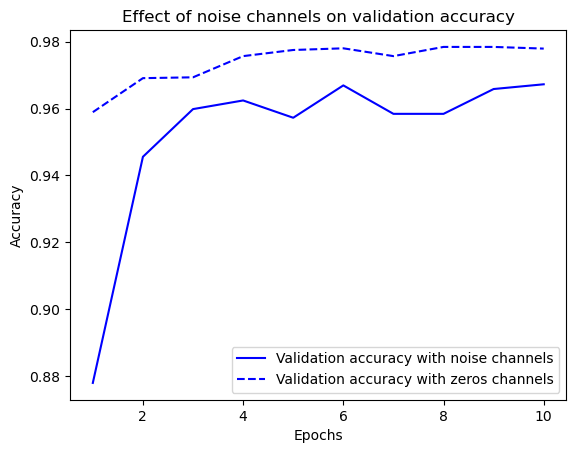

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=118,
          validation_split=0.2)

Epoch 1/100
407/407 [==============================] - 2s 4ms/step - loss: 2.3163 - accuracy: 0.1041 - val_loss: 2.3070 - val_accuracy: 0.1040
Epoch 2/100
407/407 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1161 - val_loss: 2.3119 - val_accuracy: 0.1002
Epoch 3/100
407/407 [==============================] - 2s 4ms/step - loss: 2.2920 - accuracy: 0.1287 - val_loss: 2.3197 - val_accuracy: 0.1021
Epoch 4/100
407/407 [==============================] - 2s 4ms/step - loss: 2.2791 - accuracy: 0.1408 - val_loss: 2.3287 - val_accuracy: 0.1034
Epoch 5/100
407/407 [==============================] - 2s 4ms/step - loss: 2.2619 - accuracy: 0.1500 - val_loss: 2.3332 - val_accuracy: 0.1052
Epoch 6/100
407/407 [==============================] - 2s 4ms/step - loss: 2.2408 - accuracy: 0.1675 - val_loss: 2.3540 - val_accuracy: 0.1013
Epoch 7/100
407/407 [==============================] - 2s 4ms/step - loss: 2.2169 - accuracy: 0.1801 - val_loss: 2.3676 - val_accuracy: 0.1018

Epoch 58/100
407/407 [==============================] - 2s 4ms/step - loss: 0.9615 - accuracy: 0.6777 - val_loss: 4.5938 - val_accuracy: 0.1047
Epoch 59/100
407/407 [==============================] - 2s 4ms/step - loss: 0.9472 - accuracy: 0.6814 - val_loss: 4.6266 - val_accuracy: 0.1051
Epoch 60/100
407/407 [==============================] - 2s 4ms/step - loss: 0.9312 - accuracy: 0.6885 - val_loss: 4.6858 - val_accuracy: 0.1029
Epoch 61/100
407/407 [==============================] - 2s 4ms/step - loss: 0.9186 - accuracy: 0.6930 - val_loss: 4.7654 - val_accuracy: 0.1015
Epoch 62/100
407/407 [==============================] - 2s 4ms/step - loss: 0.9078 - accuracy: 0.6967 - val_loss: 4.8388 - val_accuracy: 0.1013
Epoch 63/100
407/407 [==============================] - 2s 4ms/step - loss: 0.8916 - accuracy: 0.7012 - val_loss: 4.8725 - val_accuracy: 0.1007
Epoch 64/100
407/407 [==============================] - 2s 4ms/step - loss: 0.8789 - accuracy: 0.7062 - val_loss: 4.9236 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 991.8073 - accuracy: 0.3938 - val_loss: 4.2276 - val_accuracy: 0.2942
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 5.4421 - accuracy: 0.2496 - val_loss: 2.0773 - val_accuracy: 0.2515
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6558 - accuracy: 0.2456 - val_loss: 2.5030 - val_accuracy: 0.2665
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4968 - accuracy: 0.2231 - val_loss: 2.3417 - val_accuracy: 0.2437
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7891 - accuracy: 0.2636 - val_loss: 2.1926 - val_accuracy: 0.2192
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4576 - accuracy: 0.2471 - val_loss: 2.0216 - val_accuracy: 0.2154
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5087 - accuracy: 0.2548 - val_loss: 3.2990 - val_accuracy: 0.2649
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3718 - accuracy: 0.9117 - val_loss: 0.1850 - val_accuracy: 0.9482
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1375 - accuracy: 0.9639 - val_loss: 0.1861 - val_accuracy: 0.9597
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1216 - accuracy: 0.9724 - val_loss: 0.1874 - val_accuracy: 0.9663
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0992 - accuracy: 0.9772 - val_loss: 0.1710 - val_accuracy: 0.9712
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.9812 - val_loss: 0.2131 - val_accuracy: 0.9725
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0804 - accuracy: 0.9848 - val_loss: 0.2042 - val_accuracy: 0.9732
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9857 - val_loss: 0.2050 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 743us/step - loss: 0.6728 - accuracy: 0.8320 - val_loss: 0.3592 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 0s 579us/step - loss: 0.3512 - accuracy: 0.9037 - val_loss: 0.3078 - val_accuracy: 0.9133
Epoch 3/20
375/375 [==============================] - 0s 607us/step - loss: 0.3153 - accuracy: 0.9124 - val_loss: 0.2900 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 0s 605us/step - loss: 0.2990 - accuracy: 0.9165 - val_loss: 0.2814 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 0s 601us/step - loss: 0.2893 - accuracy: 0.9192 - val_loss: 0.2786 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 0s 590us/step - loss: 0.2829 - accuracy: 0.9201 - val_loss: 0.2718 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 0s 585us/step - loss: 0.2777 - accuracy: 0.9221 - val_loss: 0.2692 - val_accuracy:

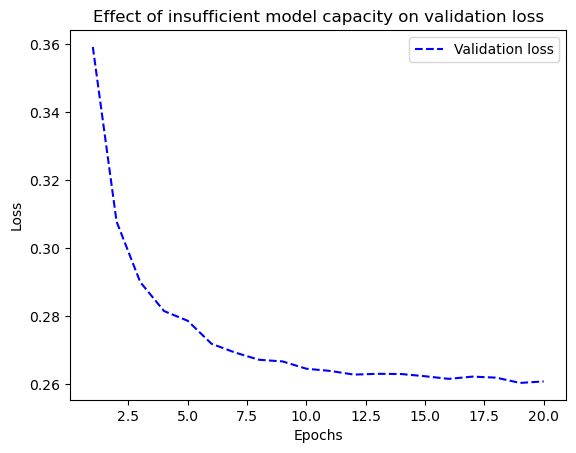

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8966 - val_loss: 0.1766 - val_accuracy: 0.9513
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9515 - val_loss: 0.1356 - val_accuracy: 0.9607
Epoch 3/100
375/375 [==============================] - 0s 992us/step - loss: 0.1150 - accuracy: 0.9648 - val_loss: 0.1121 - val_accuracy: 0.9661
Epoch 4/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9734 - val_loss: 0.1235 - val_accuracy: 0.9622
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.1061 - val_accuracy: 0.9695
Epoch 6/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9816 - val_loss: 0.0951 - val_accuracy: 0.9728
Epoch 7/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.1064 - val_accuracy: 0.96

375/375 [==============================] - 0s 1ms/step - loss: 5.2935e-04 - accuracy: 0.9998 - val_loss: 0.2808 - val_accuracy: 0.9769
Epoch 58/100
375/375 [==============================] - 0s 995us/step - loss: 6.0221e-04 - accuracy: 0.9998 - val_loss: 0.2803 - val_accuracy: 0.9765
Epoch 59/100
375/375 [==============================] - 0s 1ms/step - loss: 7.5510e-04 - accuracy: 0.9998 - val_loss: 0.2735 - val_accuracy: 0.9758
Epoch 60/100
375/375 [==============================] - 0s 992us/step - loss: 7.6393e-04 - accuracy: 0.9998 - val_loss: 0.3008 - val_accuracy: 0.9745
Epoch 61/100
375/375 [==============================] - 0s 976us/step - loss: 3.7830e-04 - accuracy: 0.9999 - val_loss: 0.2820 - val_accuracy: 0.9768
Epoch 62/100
375/375 [==============================] - 0s 1ms/step - loss: 9.8848e-04 - accuracy: 0.9996 - val_loss: 0.2890 - val_accuracy: 0.9770
Epoch 63/100
375/375 [==============================] - 0s 997us/step - loss: 9.8239e-04 - accuracy: 0.9997 - val_loss:

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5097 - accuracy: 0.7905 - val_loss: 0.3965 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3046 - accuracy: 0.8998 - val_loss: 0.3065 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2204 - accuracy: 0.9277 - val_loss: 0.2942 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1758 - accuracy: 0.9430 - val_loss: 0.2731 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1388 - accuracy: 0.9560 - val_loss: 0.2810 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.3032 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.3122 - val_accuracy: 0.8848
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5625 - accuracy: 0.7587 - val_loss: 0.4545 - val_accuracy: 0.8591
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3776 - accuracy: 0.8894 - val_loss: 0.3627 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2883 - accuracy: 0.9160 - val_loss: 0.3135 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2354 - accuracy: 0.9310 - val_loss: 0.2909 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1977 - accuracy: 0.9431 - val_loss: 0.2832 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1696 - accuracy: 0.9521 - val_loss: 0.2860 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1490 - accuracy: 0.9575 - val_loss: 0.2808 - val_accuracy: 0.8880
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 72ms/step - loss: 0.5313 - accuracy: 0.7583 - val_loss: 0.4048 - val_accuracy: 0.8233
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2567 - accuracy: 0.9012 - val_loss: 0.3668 - val_accuracy: 0.8574
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1517 - accuracy: 0.9407 - val_loss: 0.3210 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1046 - accuracy: 0.9699 - val_loss: 0.3603 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0979 - accuracy: 0.9774 - val_loss: 0.3169 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 0.5058 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 9.8794e-04 - accuracy: 0.9998 - val_loss: 0.6487 - val_accuracy: 0.8820
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5832 - accuracy: 0.7707 - val_loss: 0.4444 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3790 - accuracy: 0.9007 - val_loss: 0.3745 - val_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3170 - accuracy: 0.9178 - val_loss: 0.3650 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2851 - accuracy: 0.9298 - val_loss: 0.3855 - val_accuracy: 0.8746
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2700 - accuracy: 0.9327 - val_loss: 0.4205 - val_accuracy: 0.8617
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2569 - accuracy: 0.9395 - val_loss: 0.3619 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2487 - accuracy: 0.9433 - val_loss: 0.4070 - val_accuracy: 0.8701
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6413 - accuracy: 0.6213 - val_loss: 0.5363 - val_accuracy: 0.8391
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5250 - accuracy: 0.7581 - val_loss: 0.4131 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4374 - accuracy: 0.8203 - val_loss: 0.3367 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3653 - accuracy: 0.8577 - val_loss: 0.3290 - val_accuracy: 0.8647
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3132 - accuracy: 0.8835 - val_loss: 0.2877 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2776 - accuracy: 0.8971 - val_loss: 0.2999 - val_accuracy: 0.8765
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2439 - accuracy: 0.9117 - val_loss: 0.2739 - val_accuracy: 0.8939
Epoch 8/20
30

## Summary